In [2]:
import pandas as pd
import tweepy
import json

In [3]:
#logging into twitterAPI using tweepy library
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [22]:
tweet_list=[]
#St.Marys, Georgia
for result in tweepy.Cursor(api.search,q="*",count=1000,tweet_mode='extended',geocode="30.753830318,-81.569497722,30km").items(1000):
    tweet_list.append(result)

In [23]:
list_of_dicts = []

for json_tweet in tweet_list:
    list_of_dicts.append(json_tweet._json)

In [25]:
retweet_list=[]
for each_dict in list_of_dicts:
    tweetmsg = each_dict['full_text']
    
    retweet_list.append({'tweet_message': str(tweetmsg)})
    beachside_tweet_df = pd.DataFrame(retweet_list, columns = ['tweet_message'])

In [26]:
beachside_tweet_df.head()

,tweet_message
0,Bringin this back https://t.co/aEbNGXLEyA
1,RT @steviestevier: RT) 핫토이 @hottoysofficial 이사...
2,@Vi2Vacious you should go to Ma Poule Mouillé!!
3,I have a feeling that when Mozzie comes to the...
4,RT @steviestevier: RT) 핫토이 @hottoysofficial 이사...


In [17]:
tweet_list=[]

#Bay St. Louis, Mississippi
for result in tweepy.Cursor(api.search,q="*",count=1000,tweet_mode='extended',geocode="30.30881,-89.33005,30km").items(1000):
    tweet_list.append(result)
list_of_dicts = []

for json_tweet in tweet_list:
    list_of_dicts.append(json_tweet._json)

retweet_list=[]


for each_dict in list_of_dicts:
    tweetmsg = each_dict['full_text']
    
    retweet_list.append({'tweet_message': str(tweetmsg)})
    beachside_tweet_df2 = pd.DataFrame(retweet_list, columns = ['tweet_message'])

In [18]:
tweet_list=[]

#Astoria, Oregon
for result in tweepy.Cursor(api.search,q="*",count=1000,tweet_mode='extended',geocode="46.18788,-123.83125,30km").items(1000):
    tweet_list.append(result)
list_of_dicts = []

for json_tweet in tweet_list:
    list_of_dicts.append(json_tweet._json)

retweet_list=[]


for each_dict in list_of_dicts:
    tweetmsg = each_dict['full_text']
    
    retweet_list.append({'tweet_message': str(tweetmsg)})
    beachside_tweet_df3 = pd.DataFrame(retweet_list, columns = ['tweet_message'])

In [19]:
tweet_list=[]

#Pensacola, Florida
for result in tweepy.Cursor(api.search,q="*",count=1000,tweet_mode='extended',geocode="30.435498258,-87.205499178,30km").items(1000):
    tweet_list.append(result)
list_of_dicts = []

for json_tweet in tweet_list:
    list_of_dicts.append(json_tweet._json)

retweet_list=[]


for each_dict in list_of_dicts:
    tweetmsg = each_dict['full_text']
    
    retweet_list.append({'tweet_message': str(tweetmsg)})
    beachside_tweet_df4 = pd.DataFrame(retweet_list, columns = ['tweet_message'])

In [20]:
tweet_list=[]

#Hilo, Hawaii
for result in tweepy.Cursor(api.search,q="*",count=1000,tweet_mode='extended',geocode="19.70333052,-155.084832994,30km").items(1000):
    tweet_list.append(result)
list_of_dicts = []

for json_tweet in tweet_list:
    list_of_dicts.append(json_tweet._json)

retweet_list=[]


for each_dict in list_of_dicts:
    tweetmsg = each_dict['full_text']
    
    retweet_list.append({'tweet_message': str(tweetmsg)})
    beachside_tweet_df5 = pd.DataFrame(retweet_list, columns = ['tweet_message'])

In [28]:
beach_df = pd.concat([beachside_tweet_df,beachside_tweet_df2,beachside_tweet_df3,beachside_tweet_df4,beachside_tweet_df5])
beach_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 999
Data columns (total 1 columns):
tweet_message    5000 non-null object
dtypes: object(1)
memory usage: 78.1+ KB


In [35]:
#We will keep the retweets since those retweets are searched from same city and it was retweeted because people feel the same way

In [37]:
#This code takes forever to run because we have lots of tweets so be patient
import re
import nltk
import string
from nltk.tokenize import TweetTokenizer

wnl = nltk.WordNetLemmatizer()
punctuations = list(string.punctuation)
tokenizer = TweetTokenizer()

tweet_text = []

for tweet in beach_df['tweet_message']:
    
    tweet_tokens= tokenizer.tokenize(tweet.lower())
    #remove stop words from tweets
    tweet_token_nostop = set(tweet_tokens).difference(set(nltk.corpus.stopwords.words('english')))
    #lemmatize the tokens
    lem_tweet = [wnl.lemmatize(t) for t in tweet_token_nostop]
    #remove hashtags, remove urls in text - regular expressions
    hashtag = [h for h in lem_tweet if re.search('^#', h)]
    at = [a for a in lem_tweet if re.search('^@', a)]
    RT = [rt for rt in lem_tweet if re.search('^rt', rt)]
    urls = [url for url in lem_tweet if re.search(
        'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\), ]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', url)]
    
    tweet_cleaned = set(lem_tweet).difference(set(hashtag))
    tweet_cleaned = set(tweet_cleaned).difference(set(urls))
    tweet_cleaned = set(tweet_cleaned).difference(set(punctuations))
    tweet_cleaned = set(tweet_cleaned).difference(set(at))
    tweet_cleaned = set(tweet_cleaned).difference(set(RT))
    
    #keeping only English words since sentiment analysis won't be run on foreign languages.
    tweet_cleaned = set(tweet_cleaned).intersection(set(nltk.corpus.words.words()))
    tweet_cleaned = [item for item in tweet_cleaned if item != '️' and item != '⠀' and item != '’'and item != 'image'and item != '\u2066']
    tweet_text.append(tweet_cleaned)

In [38]:
beach_df['tokenized_words']=tweet_text

In [44]:
beach_df

,tweet_message,tokenized_words
0,Bringin this back https://t.co/aEbNGXLEyA,[back]
1,RT @steviestevier: RT) 핫토이 @hottoysofficial 이사...,"[j, c]"
2,@Vi2Vacious you should go to Ma Poule Mouillé!!,[go]
3,I have a feeling that when Mozzie comes to the...,"[drone, feeling, lot, twitch, come, think, liv..."
4,RT @steviestevier: RT) 핫토이 @hottoysofficial 이사...,"[j, c]"
5,@Sydneytaaay @doylenoir @kaylanegs False.,[false]
6,@Sydneytaaay @doylenoir @kaylanegs That’s not ...,"[name, boy]"
7,@LucasWilson23 @Sydneytaaay @doylenoir @kaylan...,"[profile, child, pic, holding, one]"
8,@enews @e_pasters14,[]
9,RT @Designsmillie: Newly made design I put tog...,"[morning, made, together, design, newly, put]"


In [46]:
#Removing rows with empty list
beach_df=beach_df[beach_df.astype(str)['tokenized_words'] != '[]']

In [47]:
#Performing sentiment analysis to add one more column that shows how positive the tweet is
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import numpy as np
sid = SentimentIntensityAnalyzer()

In [71]:
#for example word 'no' will have about 0.7 positivity when 'yes' will have 1.4019
diction = sid.polarity_scores("no")
print(diction)
#subtracting negative since we don't want to give negative weight same as positive. 
print(diction['pos']+diction['compound']-diction['neg'])

#I also deleted neutral value since we don't want neutral word to affect positivity score
diction = sid.polarity_scores("book")
print(diction)
print(sum(diction.values()))

{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.296}
-1.296
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
1.0


In [85]:
#preparing list to add into database column
positive_score = []
for words in beach_df['tokenized_words']:
    score=[]
    for word in words:
        score_dict = sid.polarity_scores(word)
        score.append(score_dict['pos']+score_dict['compound']-score_dict['neg'])
    positive_score.append(format(sum(score),'.3f'))

In [87]:
beach_df['positivity']=positive_score

C:\Users\m-sim\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [91]:
beach_df.tail(10)

,tweet_message,tokenized_words,positivity
986,@scooterdawg @TeaPainUSA Not to mention other ...,"[activity, fraudulent, mention]",-1.494
988,RT @daylankmh: no one:\n\nathletes ig stories:...,"[athlete, nominate, story, nominated, one]",0.000
989,@ThePresObama @realDonaldTrump Kettle black mo...,"[case, day, hog, kettle, continual, idiot, mom...",-1.511
990,"@Redpainter1 No, we just need to support the n...","[support, need, party, nominee, time]",2.804
991,Sko Ducks!!! https://t.co/kLRhKNkVvt,[duck],0.000
992,Join me and sign up for Shine! A daily text to...,"[help, join, morning, sign, shine, via, every,...",4.335
993,Me playing the Stones on the air right now ht...,"[air, right, stone, via]",0.000
994,@ItsJeffHudson Congrats! Wishing you many more...,"[come, many, wishing]",1.226
995,"“When people think about black women or girls,...","[instantly, girl, think, standard, woman, peop...",-1.318
999,RT @frankjsullivan: @politico After an obvious...,"[obvious, threat, go, jail]",-1.527


In [89]:
#It shows average positivity was 0.46 which is slightly negative
np.mean(beach_df['positivity'].astype(float))

0.46667359470949454

In [101]:
import matplotlib.pyplot as plt
from PIL import Image


% matplotlib inline

In [109]:
#install wordcloud package using pip install wordcloud if you don't have it
#if you get error with py3, check https://github.com/Cornices/cornice.ext.sphinx/pull/4/commits/137519cdb4af226fc08b46f1d6c2f0afa0268f60
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [126]:
#creating a string that contains all the words collected since wordcloud takes string
whole_word=''
for words in beach_df.tokenized_words:
    for word in words:
        whole_word+=(' '+word)

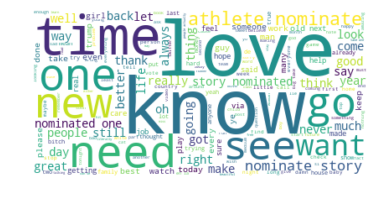

In [156]:
text = whole_word
wordcloud = WordCloud(background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
#saving word cloud
plt.savefig("beach_wordcloud.png", dpi=1000) #setting dpi increases quality of image
plt.show()